# Self Efficacy Visualizations

## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def print_column_info(df, col_name):
    """
    Print range, completeness, and data type of column with provided name and dataframe
    """
    print(f'COLUMN {col_name} | Range: {df[col_name].min()} to {df[col_name].max()} | NAs: {df[col_name].isna().sum()} | Type: {df[col_name].dtype}')

In [3]:
# load data
df = pd.read_csv('../../data/raw/rawdata_new.csv')

## Visualizations

### Do farmers think they can have a positive and active role in mitigating climate change?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [4]:
# is the data complete, in the expected range, and of the expected type?
for col_index in np.arange(40,45):
    print_column_info(df, df.columns[col_index])

# quick peek at the relevant columns
df.iloc[0:5, 40:45]

COLUMN self_reduc | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_act | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_cap | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_conf | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_not | Range: 1 to 5 | NAs: 0 | Type: int64


,self_reduc,self_act,self_cap,self_conf,self_not
0,1,4,1,1,4
1,3,3,2,2,2
2,2,1,2,3,1
3,3,3,4,4,2
4,1,2,2,2,2


Yes, the data is complete, and all columns are integers ranging from 1 to 5 inclusive as expected.

One important note about the questions here. They are all asking about the farmer's role in climate change mitigation. The questions are:
* `self_reduc`: I can do something about climate change on my farm by reducing greenhouse gases.
* `self_act`: My behavior as a farmer influences climate change.
* `self_cap`: How successfully I can reduce greenhouse gases on the farm depends mainly on my skills as a farmer.
* `self_conf`: I am confident that I can reduce greenhouse gases and at the same time produce successfully.
* `self_not`: Climate change is a problem I can not change.
A rating of 1 means I do not agree at all. A rating of 5 means I fully agree. A higher score in the first four questions indicates a farmer sees themselves as playing an active and potentially positive role in mitigation. A higher score on the last indicates a farmer sees themselves as unable to play a role in mitigation.

In [5]:
# create new dataframe with self efficacy data
self_df = df.iloc[:, 40:45].copy()
# reshape from wide to long format
self_df = pd.melt(self_df, var_name='self', value_name='rating')
# rename variables
self_df['self'] = [t[5:] for t in self_df['self']]
# check out result
self_df.sample(5)

,self,rating
54,reduc,1
473,not,4
242,cap,2
201,act,3
258,cap,4


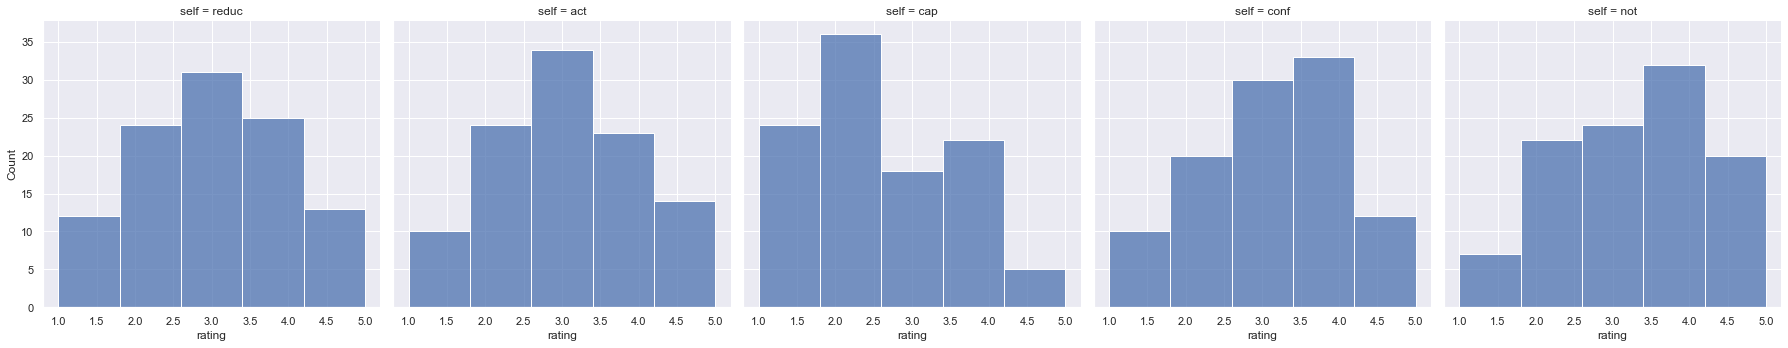

In [6]:
# visualize pereption for each event
sns.displot(self_df, x='rating', col='self', bins=5)

Unlike weather observations, farmers are pretty neutral across the self efficacy questions. Most farmers neither agree nor disagree that they can reduce greenhouse gases on their farm to do something about climate change, or that their behavior influences climate change. Most farmers disagree that successful greenhouse gas reduction depends on farming skills. Most farmers are confident they can reduce greenhouse gases while producing successfully. And most farmers agree that climate change is a problem they cannot change.

This is a bit sad! Seems like overall, the farmers who completed the survey don't thin they can play a part in climate change mitigation. Based on that alone, I would recommend more positive messaging about mitigation measures.

Now, I'll take a look at self efficacy in general, for the first four questions, where higher means more agreement that farmers play a role.

In [7]:
# create self efficacy average column for first four questions
df['self_avg'] = np.mean(df.iloc[:, 40:44], axis=1)
# quick check of the new column
print_column_info(df, 'self_avg')
# check out a sample of the data
df['self_avg'].sample(5)

COLUMN self_avg | Range: 1.0 to 4.75 | NAs: 0 | Type: float64


85    2.50
46    3.75
50    3.25
83    1.50
59    2.75
Name: self_avg, dtype: float64

<AxesSubplot:xlabel='self_avg', ylabel='Count'>

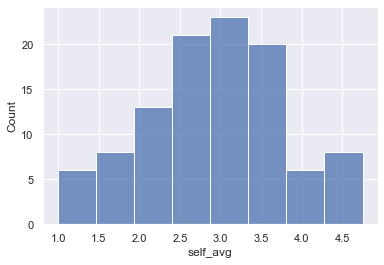

In [8]:
sns.histplot(data=df, x='self_avg')

In general, farmers are neutral as to whether they play a role in mitigating climate change. To some degree, that's fair. If you asked me about the power of an individual in a global-scale problem, I may not bo oberly optimistic either.

Is there a relationship between the first four (more active, optimistic framing) and the last (more passive, pessimistic framing) question?

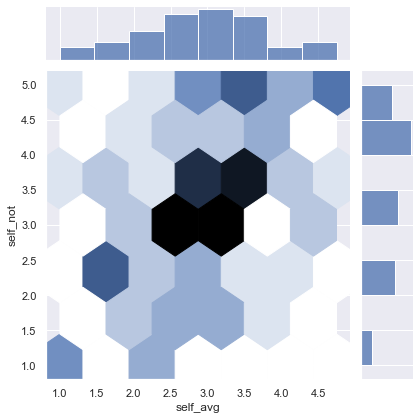

In [9]:
# plot aggregated first four questions against last question about self efficacy
sns.jointplot(data=df, x='self_avg', y='self_not', kind='hex')

Not too much of a trend to write home about here. As seen in the faceted histograms earlier, most farmers are netural in their self efficacy, and many agree climate change is not a problem they can solve.